# Study of EPIC249624646

For the star's properties, I have used those calculated in [this paper](https://arxiv.org/pdf/1901.03716.pdf).

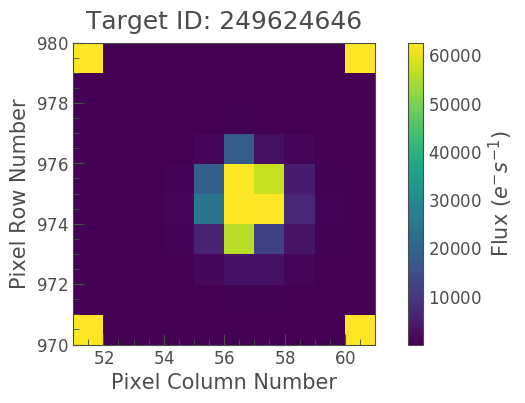

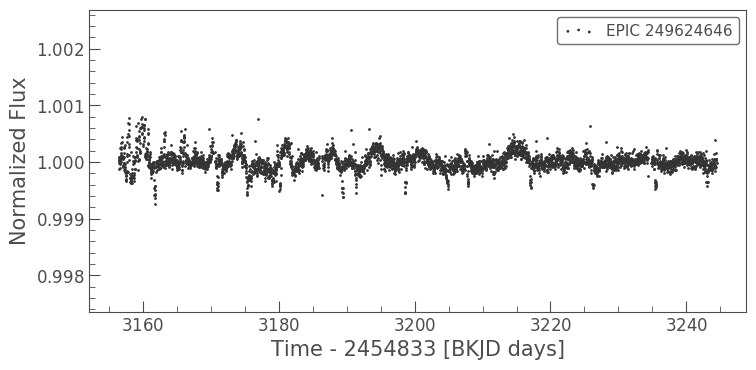

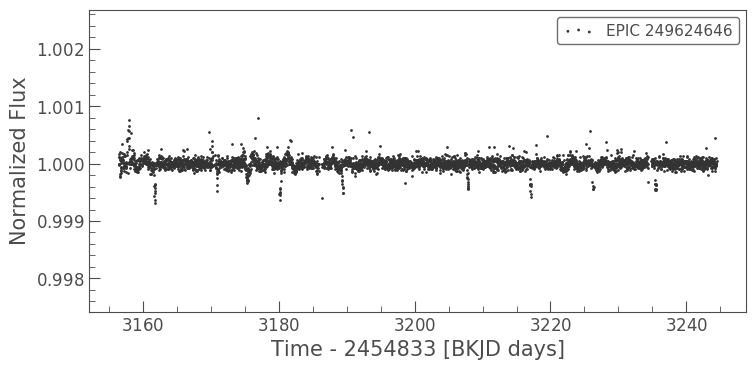

In [101]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import search_lightcurvefile
from lightkurve import search_targetpixelfile
target = '249624646'

tpf = search_targetpixelfile(target).download()
tpf.plot()
lc = search_lightcurvefile(target).download().PDCSAP_FLUX.remove_nans().remove_outliers()
lc.scatter()
corr_lc = lc.to_corrector("sff").correct(windows=40)
corr_lc_f, trend = corr_lc.flatten(window_length=401, return_trend=True)
corr_lc_f.scatter()

Best Fit Period: 18.4291 days


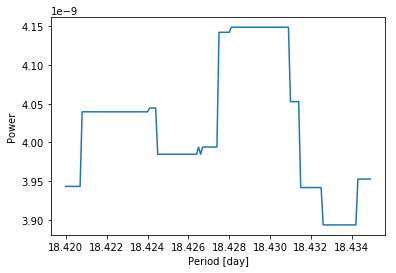

In [102]:
from astropy.stats import BoxLeastSquares

bls = BoxLeastSquares(corr_lc_f.time, corr_lc_f.flux, corr_lc_f.flux_err)
periods = np.arange(18.42, 18.435, 0.0001)
durations = np.arange(0.005, 0.15, 0.001)
periodogram = bls.power(periods, durations)

import matplotlib.pyplot as plt

plt.plot(periodogram.period, periodogram.power)
plt.ylabel("Power")
plt.xlabel("Period [day]");

period = periods[np.argmax(periodogram.power)]
print('Best Fit Period: {:0.4f} days'.format(period))

9.21454999999999

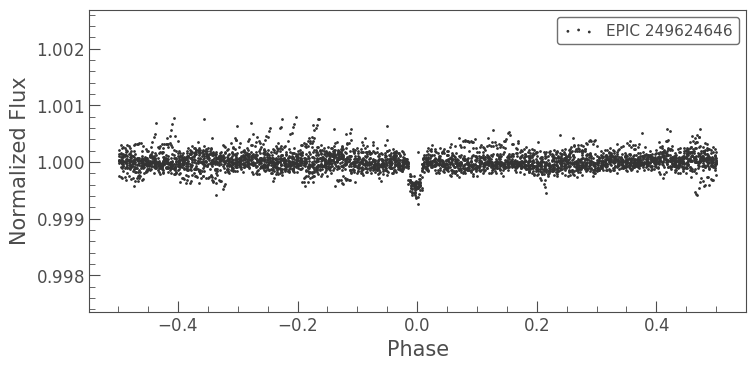

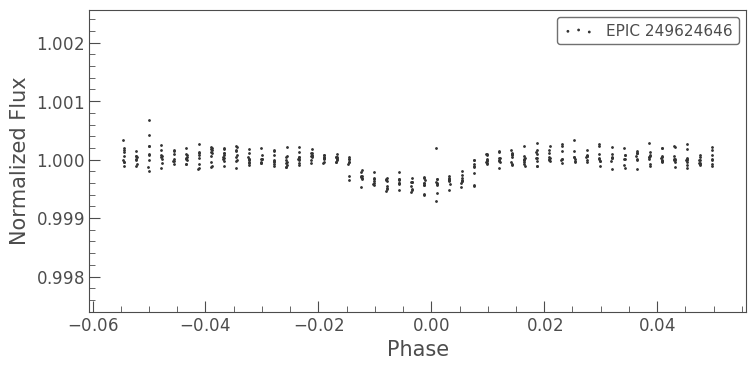

In [103]:
period_f = period / 2
lcf = lc.fold(period=period_f,t0=1.2)
lcf.scatter()
lc_transit = lcf[1800:2200].normalize()
lc_transit.scatter()
lcf.time_format = 'jd'
period_f

In [122]:
import math

R_star = 1.511 # in sun's radius
R_star = R_star * 695510000 # in meter

Td_values = lc_transit.time[lc_transit.flux < 0.9998]
Td = Td_values[-1] - Td_values[0]

min_tr = lc_transit.flux[lc_transit.flux < 0.9998].mean()
R_planet = math.sqrt(1-min_tr)*R_star
R_planet = R_planet / 69911000 # in jupiter's radius

Td , R_planet

(0.02211606333776217, 0.2956182876628986)

In [123]:
G = 6.67408 * 10**(-11)
P = period_f
M = 1.194*1.98847*10**30
a = math.sqrt(G*M*P**2/(2*3.1415))
i = math.acos(math.sqrt((R_star/a)**2 - (Td*3.1415/P)**2)) # in radians
b = a * math.cos(i)

a = a / 149597870700 # astronomical unit
b = b / R_star
i = math.degrees(i)

a, i, b

(0.30881180610441683, 88.77111767980661, 0.9433945162334477)

|      EPIC          |       249624646      |
|:------------------:|:--------------------:|
|   Planet's period  |      9.2144 days     |
|   Planet's radius  |0.296 Jupiter's radius|
| Transit's duration |      0.0221 days     |
|     Inclination    |    88.650°           |
|   Semi-major axis  |       0.2838 AU      |
|   Temperature      |       6302 K         |

In [126]:
u1 = 0.30495
u2 = 0.3095
µ = math.cos(math.asin(b))

I_b = 1 - u1*(1-µ) - u2*((1-µ)**2)

I_b, µ

(0.6579519001616491, 0.3316727102742389)

In [127]:
R_planet = R_planet * 69911000
R_planet = math.sqrt((1-min(lc_transit.flux))/I_b)*R_star
R_planet = R_planet / 69911000

R_planet

0.4929003340589223